#Build a Recurrent Neural Network (RNN) using TensorFlow and Keras with Synthetic Data

#1️⃣ Import Libraries

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#2️⃣ Generate Synthetic Classification Data

In [28]:
# Generate synthetic sequence data for binary classification
# Each sample is a sequence of 10 time steps with 5 features

num_samples = 1000
timesteps = 10
features = 5

# Random input sequences with values between 0 and 1
X = np.random.rand(num_samples, timesteps, features)

# Generate labels: if the sum of last time step > threshold, label = 1 else 0
# This gives some meaningful pattern to learn
threshold = 2.5
y = (X[:, -1, :].sum(axis=1) > threshold).astype(int)


#3️⃣ Step 3: Train-Test Split

In [29]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#4️⃣ Build the RNN Model

In [30]:
# Create a Sequential RNN model
model = Sequential()

# Add a SimpleRNN layer with 32 units
model.add(SimpleRNN(32, input_shape=(timesteps, features), activation='tanh'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#5 .Compile the Model

In [31]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Suitable for binary classification
    metrics=['accuracy']
)


#6 Train the Model

In [32]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5932 - loss: 0.6689 - val_accuracy: 0.6850 - val_loss: 0.6347
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7434 - loss: 0.6189 - val_accuracy: 0.7300 - val_loss: 0.6082
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7821 - loss: 0.5829 - val_accuracy: 0.7850 - val_loss: 0.5769
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8486 - loss: 0.5480 - val_accuracy: 0.9000 - val_loss: 0.5502
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8631 - loss: 0.5244 - val_accuracy: 0.8150 - val_loss: 0.5335
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8375 - loss: 0.5049 - val_accuracy: 0.8950 - val_loss: 0.5002
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8778 - loss: 0.4837 - val_accuracy: 0.9100 - val_loss: 0.4773
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9101 - loss: 0.4513 - val_accuracy: 0.9100 - val_loss

#7 Evaluate the Model

In [33]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 92.00%


#8: Visualize Training History

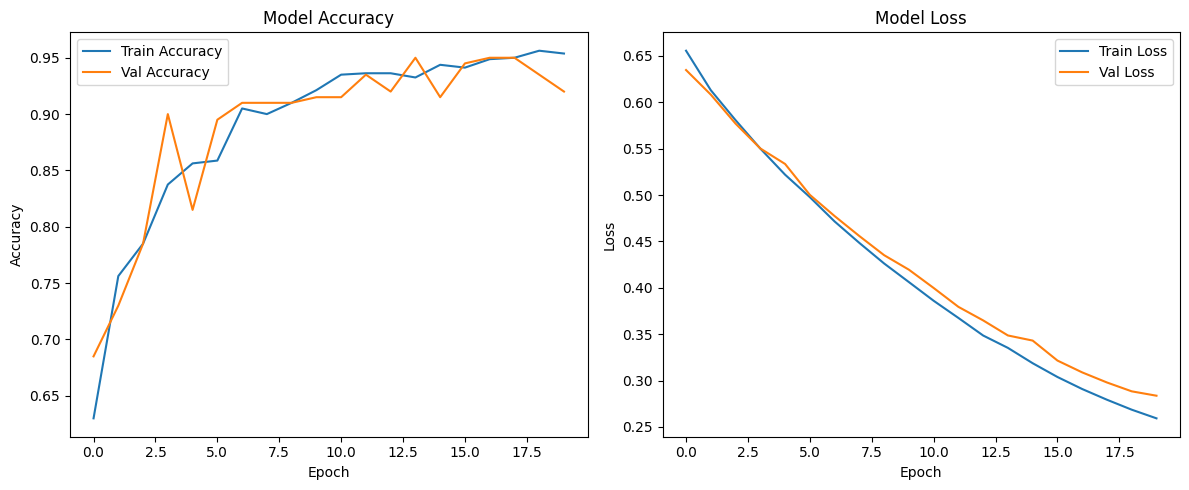

In [34]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# 9: Make Predictions

In [35]:
# Predict on test samples
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary classes
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Show first 10 predictions
print("Predicted Classes:", y_pred_class[:10].ravel())
print("Actual Classes:   ", y_test[:10])


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Classes: [1 1 0 1 0 1 1 1 0 1]
Actual Classes:    [1 1 0 1 1 1 1 1 0 1]


#🧠 Summary

- We built and trained an RNN model using Keras on synthetic sequential data.
- The RNN learned to classify sequences based on patterns in the final time step.
- This can be extended to text classification, stock prediction, time-series problems, etc.
